In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import torch
import torchvision.transforms as transforms

from lib import models
from lib.core import inference


In [21]:
model = models.get_fully_pretrained_pose_net().cuda()
model.eval()
# image_file = "data/roos.jpg"

PoseResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bi

(3265, 4898, 3)
(256, 256, 3)
(1, 17, 64, 64)


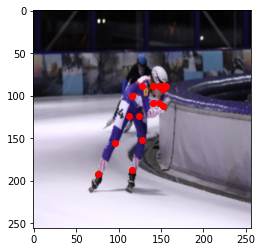

<Figure size 432x288 with 0 Axes>

In [88]:
image_file = "data/roos2.jpg"
def pose_estimate(img_file, resize = 256):
    
    normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
    )
    transform = transforms.Compose([transforms.ToTensor(), normalize])
    # cv2.IMREAD_COLOR | cv2.IMREAD_IGNORE_ORIENTATION
    data_numpy = cv2.imread(
        str(image_file), cv2.IMREAD_COLOR# | cv2.IMREAD_IGNORE_ORIENTATION
    )
    print(data_numpy.shape)
    data_numpy = cv2.resize(data_numpy, (resize, resize)) 
    print(data_numpy.shape)
    input = transform(data_numpy).cuda()
    output = model(input[None, :, :, :]).detach().cpu().numpy()
    print(output.shape)  
    pred, val = inference.get_max_preds(output)
    plt.figure()
    plt.imshow(cv2.cvtColor(data_numpy, cv2.COLOR_BGR2RGB), cmap = 'gray', interpolation = 'bicubic')
    for p in pred[0]:
        plt.plot((p[0]/output.shape[-1])*resize,p[1]/output.shape[-1]*resize, marker='o', color='r')
    plt.show()
    plt.savefig(img_file.replace(".jpg","_marked.jpg"))
    

pose_estimate(image_file)

(3265, 4898, 3)
(256, 256, 3)
(1, 17, 64, 64)


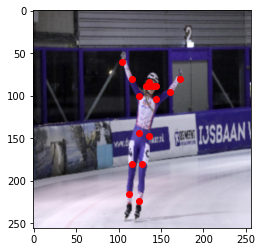

<Figure size 432x288 with 0 Axes>

In [89]:
image_file = "data/roos.jpg"
pose_estimate(image_file)

(4608, 3456, 3)
(256, 256, 3)
(1, 17, 64, 64)


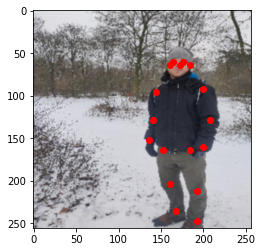

<Figure size 432x288 with 0 Axes>

In [90]:
image_file = "data/tako.jpg"
pose_estimate(image_file)

(4608, 3456, 3)
(256, 256, 3)
(1, 17, 64, 64)


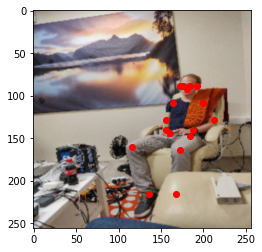

<Figure size 432x288 with 0 Axes>

In [92]:
image_file = "data/tako2.jpg"
pose_estimate(image_file)